## Excercise 1 
# Try your own linear regression algorithm 

In [12]:
#importamos la libreria pandas
import pandas as pd
import numpy as np

In [3]:


# read CSV file directly from a URL and save the results
# use .read_csv method and simply pass in the name of the files (local and through a url)
# to find out more about this method, click on the url and press shift + tab (twice)
# we set the index_col=0
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# display the first 5 rows
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


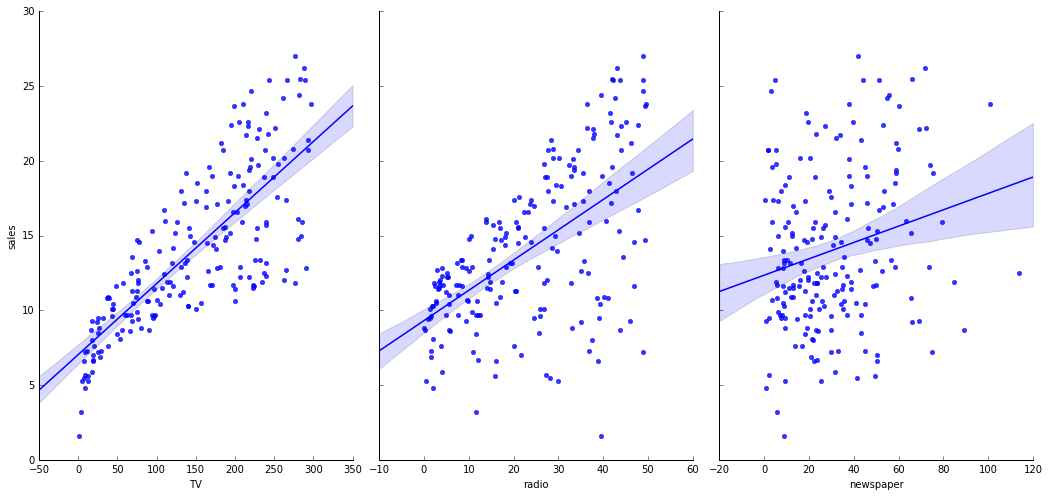

In [4]:
import seaborn as sns
%matplotlib inline

sns.pairplot(data, x_vars=['TV','radio','newspaper'],y_vars='sales',size=7, aspect = 0.7,kind='reg')

In [5]:

#codigo para heredar y darle el formato a las matrices

feature_cols = ['TV','radio','newspaper']

X = pd.DataFrame(data, columns = feature_cols)

X = data[['TV','radio','newspaper']] # la cantidad de datos que estaran en la tabla
#print(type(X))
##print(X)
#z = X.iloc[0]
#print(X.iloc[0])#acceso directo a la tupla 0
#print(X.iloc[0]['TV']) # acceso directo a los numeros (en formato numpy.float64)
#print(type(z))
y = data[['sales']]

In [6]:
# importamos uno de las funcionalidades de scikit para dividir
# la base de datos en una parte de entrenamiento y otra de test casi
# 75 y 25 %

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#X_train

In [7]:
#y_train

In [8]:
#función para concatenar tabla de datos de entrenamiento y de resultados
result = pd.concat([X_train,y_train],axis=1)

#result : devuelve tabla -> cols: 'TV','radio','newspaper','sales'


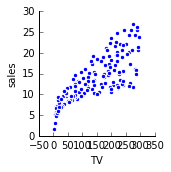

In [9]:
#ejemplo de PLOT en este caso TV vs sales
sns.pairplot(result,x_vars=['TV'],y_vars=['sales'])

In [37]:
# esta sera mi tabla para entrenamiento

a = X_train[['TV','radio','newspaper']]
b = y_train[['sales']]

##print(a,b)

# importar para numeros aleatorios[0,1]
##from random import uniform as randUniform
#theta_0 = randUniform(0,1)
#theta_1 = randUniform(0,1)

#print(type(a))

#import numpy as np
#v1=np.array([1, 2, 3])
#v2=np.array([1, 2, 3])

# #t= np.dot(v1,v2)

# a = [[1, 0], [0, 1]]
# b = [[4, 1], [2, 2]]

# t = np.dot(a,b)

#Preparamos las matrices para ingresar a nuestra función
a = a.as_matrix()
a = np.c_[np.ones(150),a]

print(a)


b = b.as_matrix()

print(b)




[[   1.   289.7   42.3   51.2]
 [   1.   123.1   34.6   12.4]
 [   1.    19.4   16.    22.3]
 [   1.   182.6   46.2   58.7]
 [   1.   265.6   20.     0.3]
 [   1.   165.6   10.    17.6]
 [   1.   218.5    5.4   27.4]
 [   1.    25.    11.    29.7]
 [   1.   232.1    8.6    8.7]
 [   1.    43.    25.9   20.5]
 [   1.   139.2   14.3   25.6]
 [   1.   139.3   14.5   10.2]
 [   1.     5.4   29.9    9.4]
 [   1.   293.6   27.7    1.8]
 [   1.   281.4   39.6   55.8]
 [   1.     8.7   48.9   75. ]
 [   1.    80.2    0.     9.2]
 [   1.   137.9   46.4   59. ]
 [   1.   227.2   15.8   49.9]
 [   1.    31.5   24.6    2.2]
 [   1.   262.7   28.8   15.9]
 [   1.   213.5   43.    33.8]
 [   1.   287.6   43.    71.8]
 [   1.    11.7   36.9   45.2]
 [   1.    17.9   37.6   21.6]
 [   1.   209.6   20.6   10.7]
 [   1.    23.8   35.1   65.9]
 [   1.    76.4    0.8   14.8]
 [   1.   250.9   36.5   72.3]
 [   1.   141.3   26.8   46.2]
 [   1.   187.8   21.1    9.5]
 [   1.   134.3    4.9    9.3]
 [   1. 

In [14]:
# definir una función que devuelva el error por Mínimos Cuadrados
# entran dos vectores y retorna la distancia euclidea entre ambos
def LeastSquares(v1,v2):
    import math
    length = v1.shape[0]
    values = np.zeros(length)
    for i in range(length):
        values[i] = v1[i] - v2[i]
        values[i] = math.pow(values[i],2)
    return np.sum(values) / 2.0


In [38]:
# definir una función acepte una matriz de entrenamiento y una de resultados
# y devuelva un array de pesos ya corregidos
import numpy as np
def BatchLinearRegresion(trainingSet,targetValues):
    length = trainingSet.shape[1]
    #Inicializamos la cantidad de pesos a utilizar
    import random

    weights = np.full((length, 1), 0.0)
    for i in range( length ):
        weights[i] = random.random()
    
    estimades = np.dot(trainingSet,weights)
    print("Error inicial:",LeastSquares(estimades,targetValues))
    
    #alpha = 0.0000001 #Con este me convergio
    alpha = 0.0000001
    
    #numeroIter = 2000000 #mejores valores
    
    numeroIter = 2000000
    
    print(weights)
    
    for i in range(numeroIter):
        #print("iteracion",i)
        weights = weights + alpha*(np.dot(trainingSet.T,(targetValues-estimades)))
        #print(weights)
        estimades = np.dot(trainingSet,weights)
        #print("Error:",LeastSquares(estimades,targetValues))
    print("Vector de Pesos(theta)")
    print(weights)
    
    err = np.linalg.norm(estimades-targetValues)
    print("Error:",err)
    return err


BatchLinearRegresion(a,b)

Error inicial: 1114526.44048
[[ 0.49547906]
 [ 0.53502648]
 [ 0.97961964]
 [ 0.82761652]]
Vector de Pesos(theta)
[[ 2.85489223]
 [ 0.04662558]
 [ 0.1794116 ]
 [ 0.00358523]]
Error: 21.5181347795


21.518134779506038

El error conseguido fue de 21.51. El principal problema encontrado fue la calibración de los coeficientes del algoritmo

## Excercise 2
Try nonlinear features and measure the RMSE

## Modelo exponencial

$$Y \approx a.e^{bx.cy...}$$

linealizando valores tenemos:

$$ ln(Y)  \approx ln(a) + b.X + cY +... $$


In [39]:
# modificamos nuestros valores esperados y les sacamos ln()
import math

def ln(x):
    return math.log(x)

ln_v = np.vectorize(ln)

b2 = ln_v(b)

error_exp = BatchLinearRegresion(a,b2)

error_exp = math.exp(error_exp)

Error inicial: 20149.9197308
[[ 0.58803478]
 [ 0.0933605 ]
 [ 0.0338118 ]
 [ 0.06805226]]
Vector de Pesos(theta)
[[  1.72159929e+00]
 [  3.77073022e-03]
 [  1.10492586e-02]
 [  7.91039258e-04]]
Error: 2.4722840959


2.472284095896824

RMSE = 2.472..

Se cuenta con un mejor ajuste. Pero notemos que si queremos obtener las variables reales deberemos tener cuidado al regresar a la ecuación.

Se verifica que se pueden implementar modelos 'linealizables', y que ellos,a su vez, pueden tener mejores ajustes